In [2]:
import tensorflow as tf
import keras

In [3]:
# check for versions

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", keras.__version__)

Tensorflow Version:  2.20.0
Keras Version:  3.11.3


In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten, Input
from keras.layers import Dropout

## Dataset

In [5]:
# load the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# print the shapes

print("Shape of training data: ", X_train.shape)
print("Shape of the test data: ", X_test.shape)

Shape of training data:  (60000, 28, 28)
Shape of the test data:  (10000, 28, 28)


In [7]:
y_train.shape

(60000,)

In [9]:
# image shape

num_images, img_rows, img_cols = X_train.shape

img_rows, img_cols

(28, 28)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
pd.Series(y_train).nunique()

10

In [12]:
# batch size, epochs, num_classes

batch_size = 32
epochs = 3
num_classes = pd.Series(y_train).nunique()

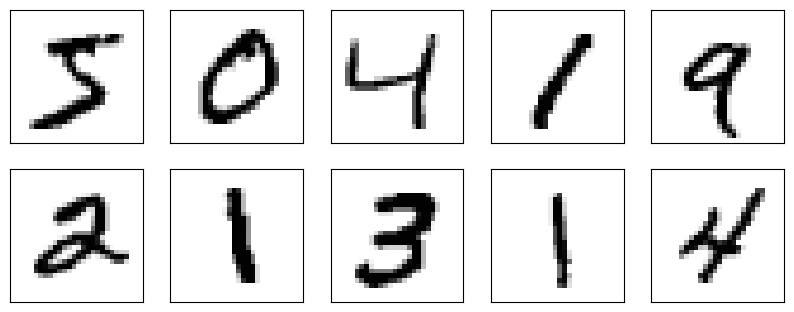

In [18]:
# plot the first 10 datapoints

plt.figure(figsize=(10,10))

# create the grid of 10 images
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i,:,:], cmap=plt.cm.binary)

In [19]:
# datatype of the input

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [20]:
# normalize the pixel values

X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train.ndim

3

In [25]:
# added channel information in our data

X_train = np.expand_dims(X_train, axis=3)

X_test = np.expand_dims(X_test, axis=3)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
X_train.ndim, X_test.ndim

(4, 4)

## Model

In [31]:
# define the model

model = Sequential()

In [32]:
# add convolution layers to the model

# input layer
model.add(Input(shape=(img_rows, img_cols, 1)))

# convolution layer
model.add(Conv2D(16, kernel_size=(3,3), padding="valid", activation="relu"))
# max pool layer
model.add(MaxPool2D(pool_size=(2,2)))

In [33]:
# flatten the output
model.add(Flatten())

# fc layers
# hidden layer
model.add(Dense(units=32, activation="relu"))

# dropout layer
model.add(Dropout(rate=0.4))

# output layer
model.add(Dense(units=num_classes, activation="softmax"))

In [34]:
# model summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        86,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,050 (340.04 KB)

 Trainable params: 87,050 (340.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [37]:
# compile our model

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
# fit the model on training data

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 37ms/step - accuracy: 0.8532 - loss: 0.4725 - val_accuracy: 0.9635 - val_loss: 0.1189
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9306 - loss: 0.2311 - val_accuracy: 0.9753 - val_loss: 0.0813
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.9456 - loss: 0.1818 - val_accuracy: 0.9786 - val_loss: 0.0675


In [39]:
# evaluate the model on test data

model.evaluate(X_test,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9786 - loss: 0.0675


{'accuracy': 0.978600025177002, 'loss': 0.06747984886169434}

## SHAP

In [40]:
import shap

d:\shap-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
# create the background data with 100 samples

background = X_train[(np.random.choice(X_train.shape[0], 100, replace=False))]

background.shape

(100, 28, 28, 1)

In [42]:
# explainer

explainer = shap.DeepExplainer(model=model,
                               data=background)

d:\shap-project\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
d:\shap-project\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)


In [64]:
# calculate the shap values

test_data = X_test[0:5]

test_data.shape

(5, 28, 28, 1)

In [65]:
shap_values = explainer(test_data)

d:\shap-project\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_11
Received: inputs=['Tensor(shape=(5, 28, 28, 1))']
  warnings.warn(msg)


shap_values = [numpy.array]  
List of arrays of SHAP values. Each array has the shape (# samples x width x height x channels), and the length of the list is equal to the number of model outputs that are being explained.   

pixel_values = numpy.array  
Matrix of pixel values (# samples x width x height x channels) for each image. It should be the same shape as each array in the shap_values list of arrays.

In [66]:
shap_values.values.shape

(5, 28, 28, 1, 10)

In [67]:
shap_values.values[:,:,:,:,2].shape

(5, 28, 28, 1)

In [68]:
# shap values list

shap_values_list = []

for i in range(10):
    shap_values_list.append(shap_values.values[:,:,:,:,i])

In [69]:
len(shap_values_list)

10

In [70]:
shap_values_list[0].shape

(5, 28, 28, 1)

In [71]:
test_data.shape

(5, 28, 28, 1)

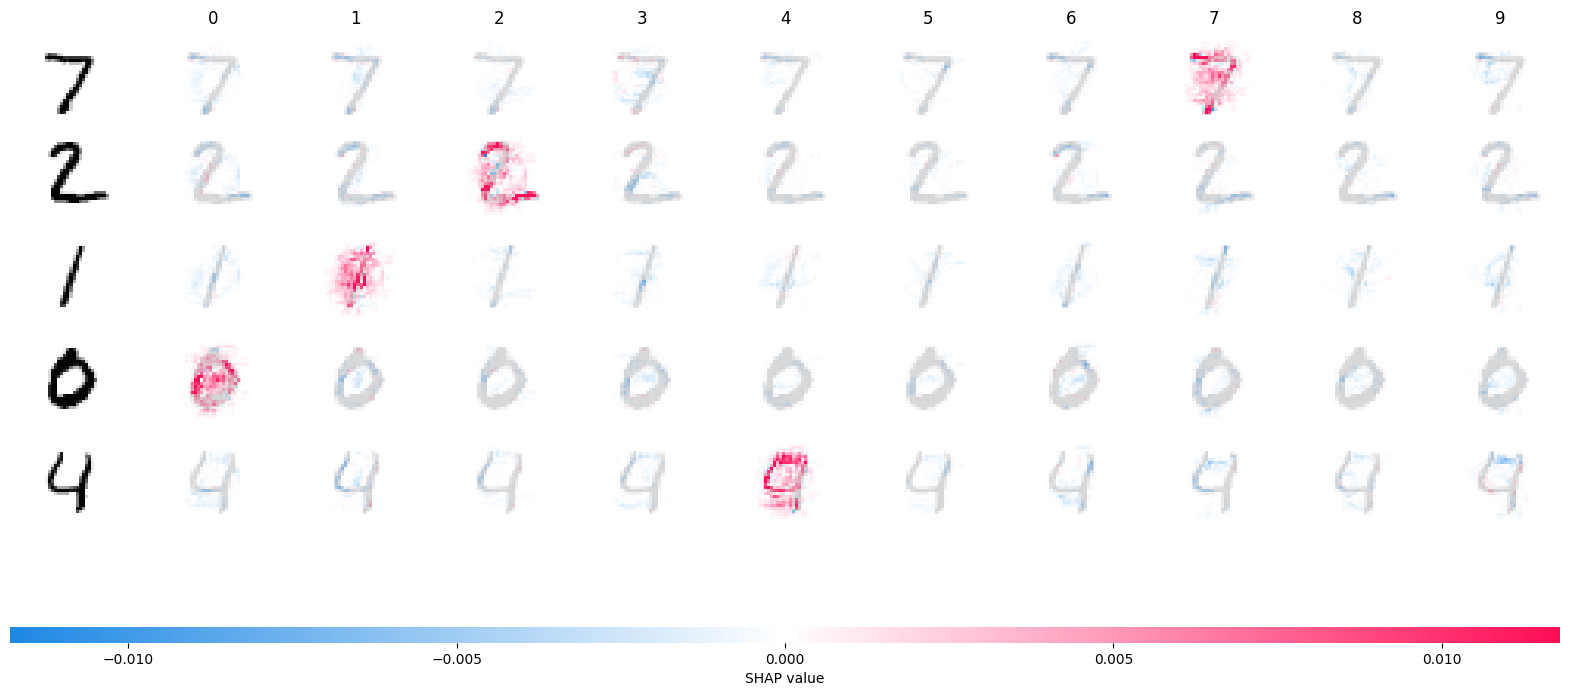

In [72]:
# plot the image plot

shap.plots.image(shap_values_list, -test_data, labels=list(range(10)))